# Crops in the US (1980 - 2022)

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib as plt

from pandas_profiling import ProfileReport

## 1 Data Overview

### 1.1 Data Load

In [3]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/05_ML_CropsUSA/crops_usa.csv')

In [4]:
data.head()

,Year,State,State ANSI,Acres,Production
0,2019,ALABAMA,1,130000,6120000
1,2019,ARIZONA,4,34000,3432000
2,2019,ARKANSAS,5,110000,2600000
3,2019,CALIFORNIA,6,420000,7244000
4,2019,COLORADO,8,2150000,98000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1670 non-null   int64 
 1   State       1670 non-null   object
 2   State ANSI  1670 non-null   int64 
 3   Acres       1670 non-null   int64 
 4   Production  1670 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 65.4+ KB


In [11]:
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.2 Data Overview

#### 1.2.1 Years

In [5]:
# создайте список years_unique
years_unique = []

# добавьте в него уникальные значения из Year
for i in range(len(data['Year'])):
    if data['Year'][i] not in years_unique:
        years_unique.append(data['Year'][i])

print(years_unique)
print(len(years_unique))  # выведите длину списка years_unique

[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980]
40


#### Conclusion: The data is collected for 40 years form 1980 till 2019.

#### 1.2.2 States

In [6]:
# создайте список states_unique
states_unique = []

# добавьте в него уникальные значения из колонки State
for i in range(len(data['State'])):
    if data['State'][i] not in states_unique:
        states_unique.append(data['State'][i])

print(states_unique)
print(len(states_unique))  # выведите длину списка states_unique

['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'DELAWARE', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'KANSAS', 'KENTUCKY', 'MARYLAND', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VIRGINIA', 'WASHINGTON', 'WISCONSIN', 'WYOMING', 'FLORIDA', 'IOWA', 'LOUISIANA', 'NEVADA', 'WEST VIRGINIA']
42


#### Conclusion: The data is collected for 42 states out of 50. Probably, either not all the states share the statisics about the annual crop yield or the crop is not plantes there. Anyway, we keep in mind that the data represents only 42 states out of 50.

### 1.2.3 Area

The easiest way to estimate the difference in the area under crops in different states is to use at a bar chart: it will correspond to the size of the state, and its height will correspond to the number of each acre planted in a year.

In [7]:
# преобразуем Acres, Year и State в списки
acres = list(data['Acres'])
years = list(data['Year'])
states = list(data['State'])

# создайте новые списки
acres_2019 = []
states_2019 = []

# отфильтруйте значения в acres и states по значению в year
for i in range(len(acres)):
    if years[i] == 2019:
        acres_2019.append(acres[i])
        states_2019.append(states[i])

print(acres_2019)
print(states_2019)

[130000, 34000, 110000, 420000, 2150000, 60000, 150000, 1195000, 650000, 330000, 6900000, 460000, 345000, 540000, 1450000, 45000, 550000, 5450000, 1070000, 19000, 360000, 90000, 290000, 7505000, 500000, 4200000, 740000, 180000, 70000, 1500000, 280000, 4500000, 125000, 180000, 2260000, 195000, 125000]
['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'DELAWARE', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'KANSAS', 'KENTUCKY', 'MARYLAND', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VIRGINIA', 'WASHINGTON', 'WISCONSIN', 'WYOMING']


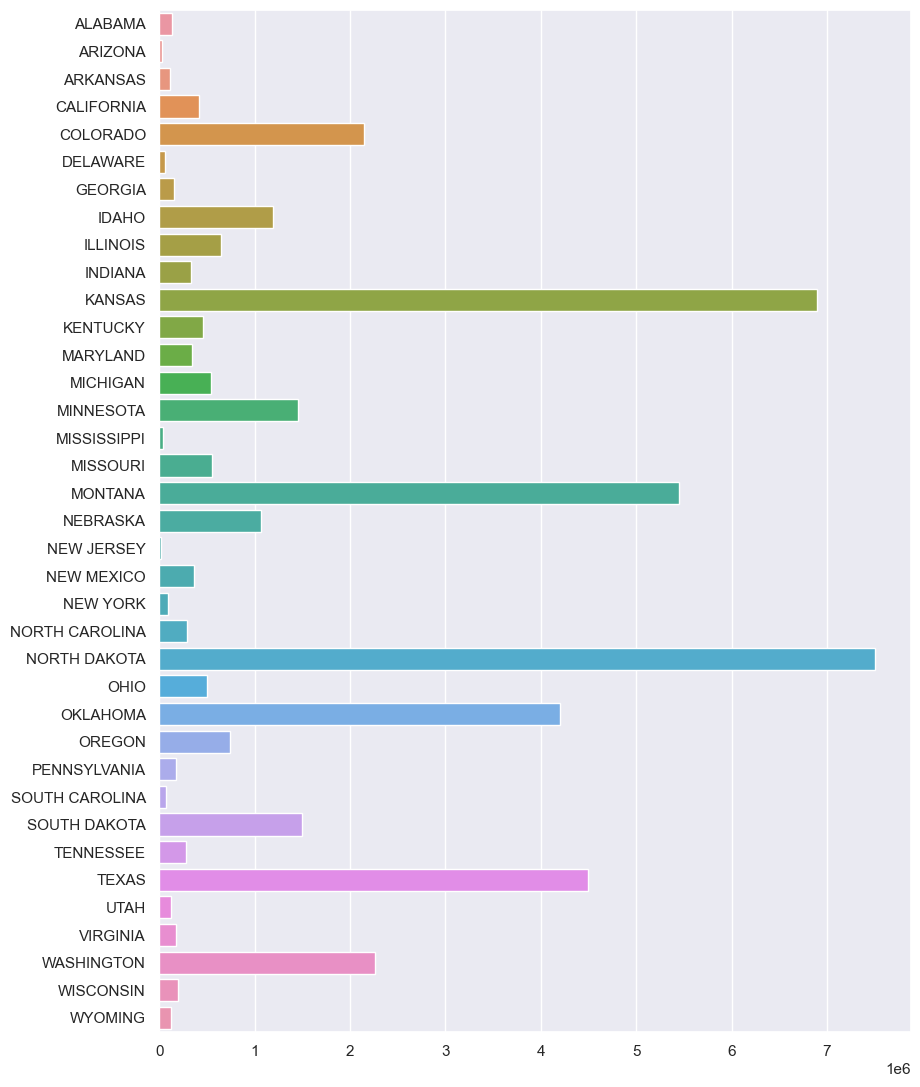

In [21]:
sb.set(rc={'figure.figsize':(9.7, 13.27)})
sb.barplot(x=acres_2019, y=states_2019);

#### Conclusion: We can from the barplot that 90$ of the crop yield are produced by 10% of the states. Is that really so? Let's test it!

### 1.2.4 Crop Yield Frequency Distribution

In [18]:
production =  list(data['Production'])
years = list(data['Year'])
states = list(data['State'])

# production_2019
states_2019 = []
production_2019 = []

for index in range(len(years)):
    if years[index] == 2019:
        production_2019.append(production[index])
        states_2019.append(states[index])

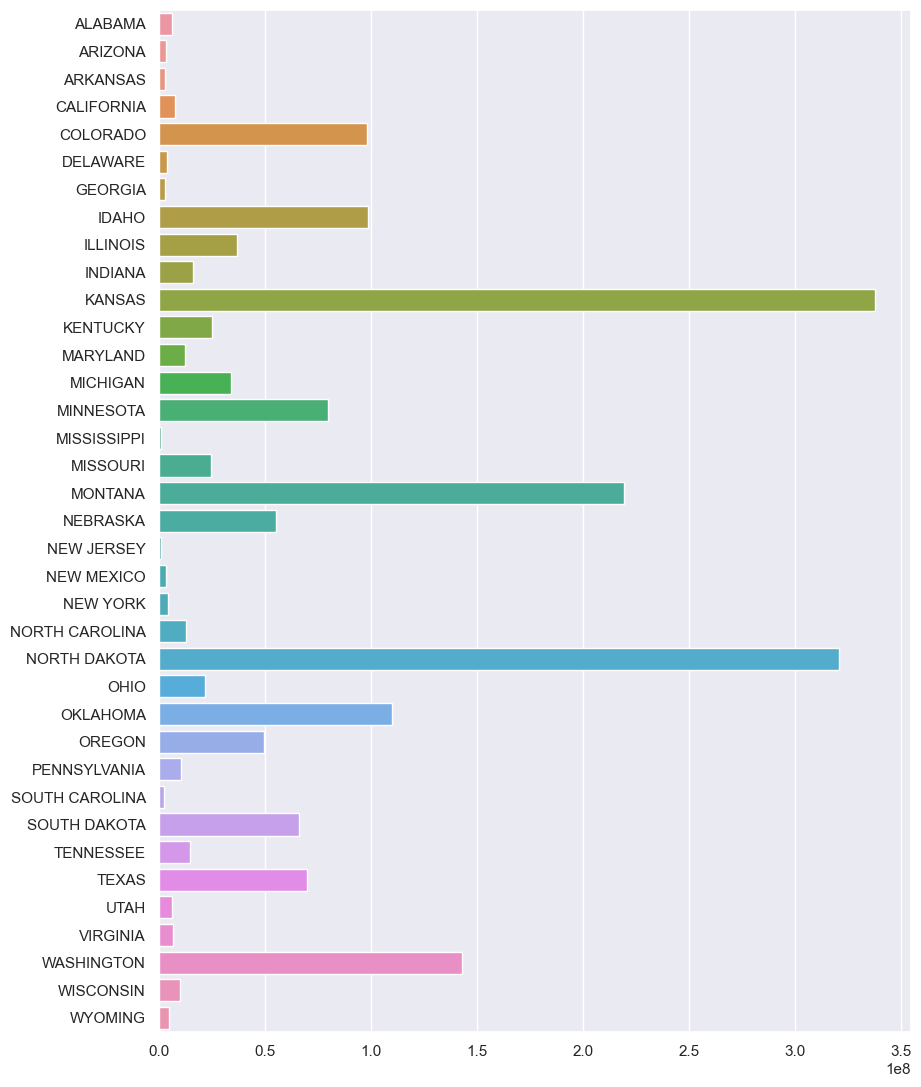

In [20]:
sb.set(rc={'figure.figsize':(9.7, 13.27)})
sb.barplot(x=production_2019, y=states_2019);

#### Conclusion: The more areas, the more yield. Also, it is interesting that in Texas in 2019 there was the same amount of crop yield as in South Dakota; however, in South Dakota there are 3 times less crop filelds.